**HR Analytics: Job Change of Data Scientists**

Dataset source: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists  

In [290]:
# Library

# Basic Statistic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Statistics
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve,average_precision_score,plot_precision_recall_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.utils.class_weight import compute_class_weight

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Problem Statement

**Background**  
<p style='text-align: justify;'> A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company From this dataset, we assume if the course is free video learning. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

0 : Not looking for job change  
1 : Looking for a job change

**Problem Statement :**

Hiring process could be time and resource consuming if company targets all candidates only based on their training participation. Company wants to increase recruitment efficiency by knowing which candidates are looking for a job change in their career so they can be hired as data scientist.  

CPH Formula: 
<img src='Formula-CPH.jpg'>

<p style='text-align: justify;'>If company use old method, they need to offer all candidates and it will use more money and HR Departments have time limit too, they can't ask all candidates 1 by 1 and usually they will take random candidates. It still not efficient because people want to change job is less than not. So we need new method which can reduce cost (money and time) and make success probability increase to reduce CPH.
    
The cost that can be reduced include:
* Job board fees : fee for adertise job vacancy
* External recruiters expenses : fee for headhunters or agency
* Employer branding efforts : fee for recruit at event like job fair or university event
* Internal recruiters cost : fee for travel or anything to recruit beside in office
* Time to recruit : time to select the candidate from beginning until finish 

**Goals :**

<p style='text-align: justify;'>Reduce cost and increase probability candidate to be hired can make cost per hire decrease and recruitment process more efficient. To predict candidates who will change job or not, we can't use simple statistic and need machine learning so company can categorized candidates who are looking and not looking for a job change. In the end HR Department can have more option to recruit with same budget if compare with old method and also have more time to focus at candidate qualification and get the best candidates to company.

**Metric Evaluation**

<img src='Matrix.png'>

Type 1 error : False Positive  
Consequences: loss of recruitment cost, time and resource

Type 2 error : False Negative  
Consequences: loss of potential candidate  

We want to focus in class 1 and minimalized type 1 error because false positive more costly.

# Data Understanding

In [291]:
#Load Dataset
df = pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


**Description:**  
* enrollee_id : Unique ID for candidate 
* city: City code (unknown) 
* city_ development _index (CDI): Developement index of the city (scaled). Ranks cities according to their Infrastructure, Waste Management, Health, Education, and City Product
* gender: Gender of candidate 
* relevent_experience: Relevant experience of candidate 
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate 
* major_discipline :Education major discipline of candidate 
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company 
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job 
* training_hours: training hours completed 
* target: Candidates who decide looking for a job change or not

In [292]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

This dataset have more catagorical data then numerical dataset

# Exploratory Data Analysis (EDA)

In [293]:
# Describing non Numerical Data
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [294]:
# Describing Numerical Data
df.describe().drop(columns=['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* In `city_development_index` (CDI), the mean values is 0.828, median 0.903 and std 0.123. It means that most of the candidates are from well-developed cities.
* In `training_hours` , the mean values is 65.367, median 47 and max 336. That means there are more candidates with low training hours but some candidates spend much time to do training.

## Overall Data Value Counts

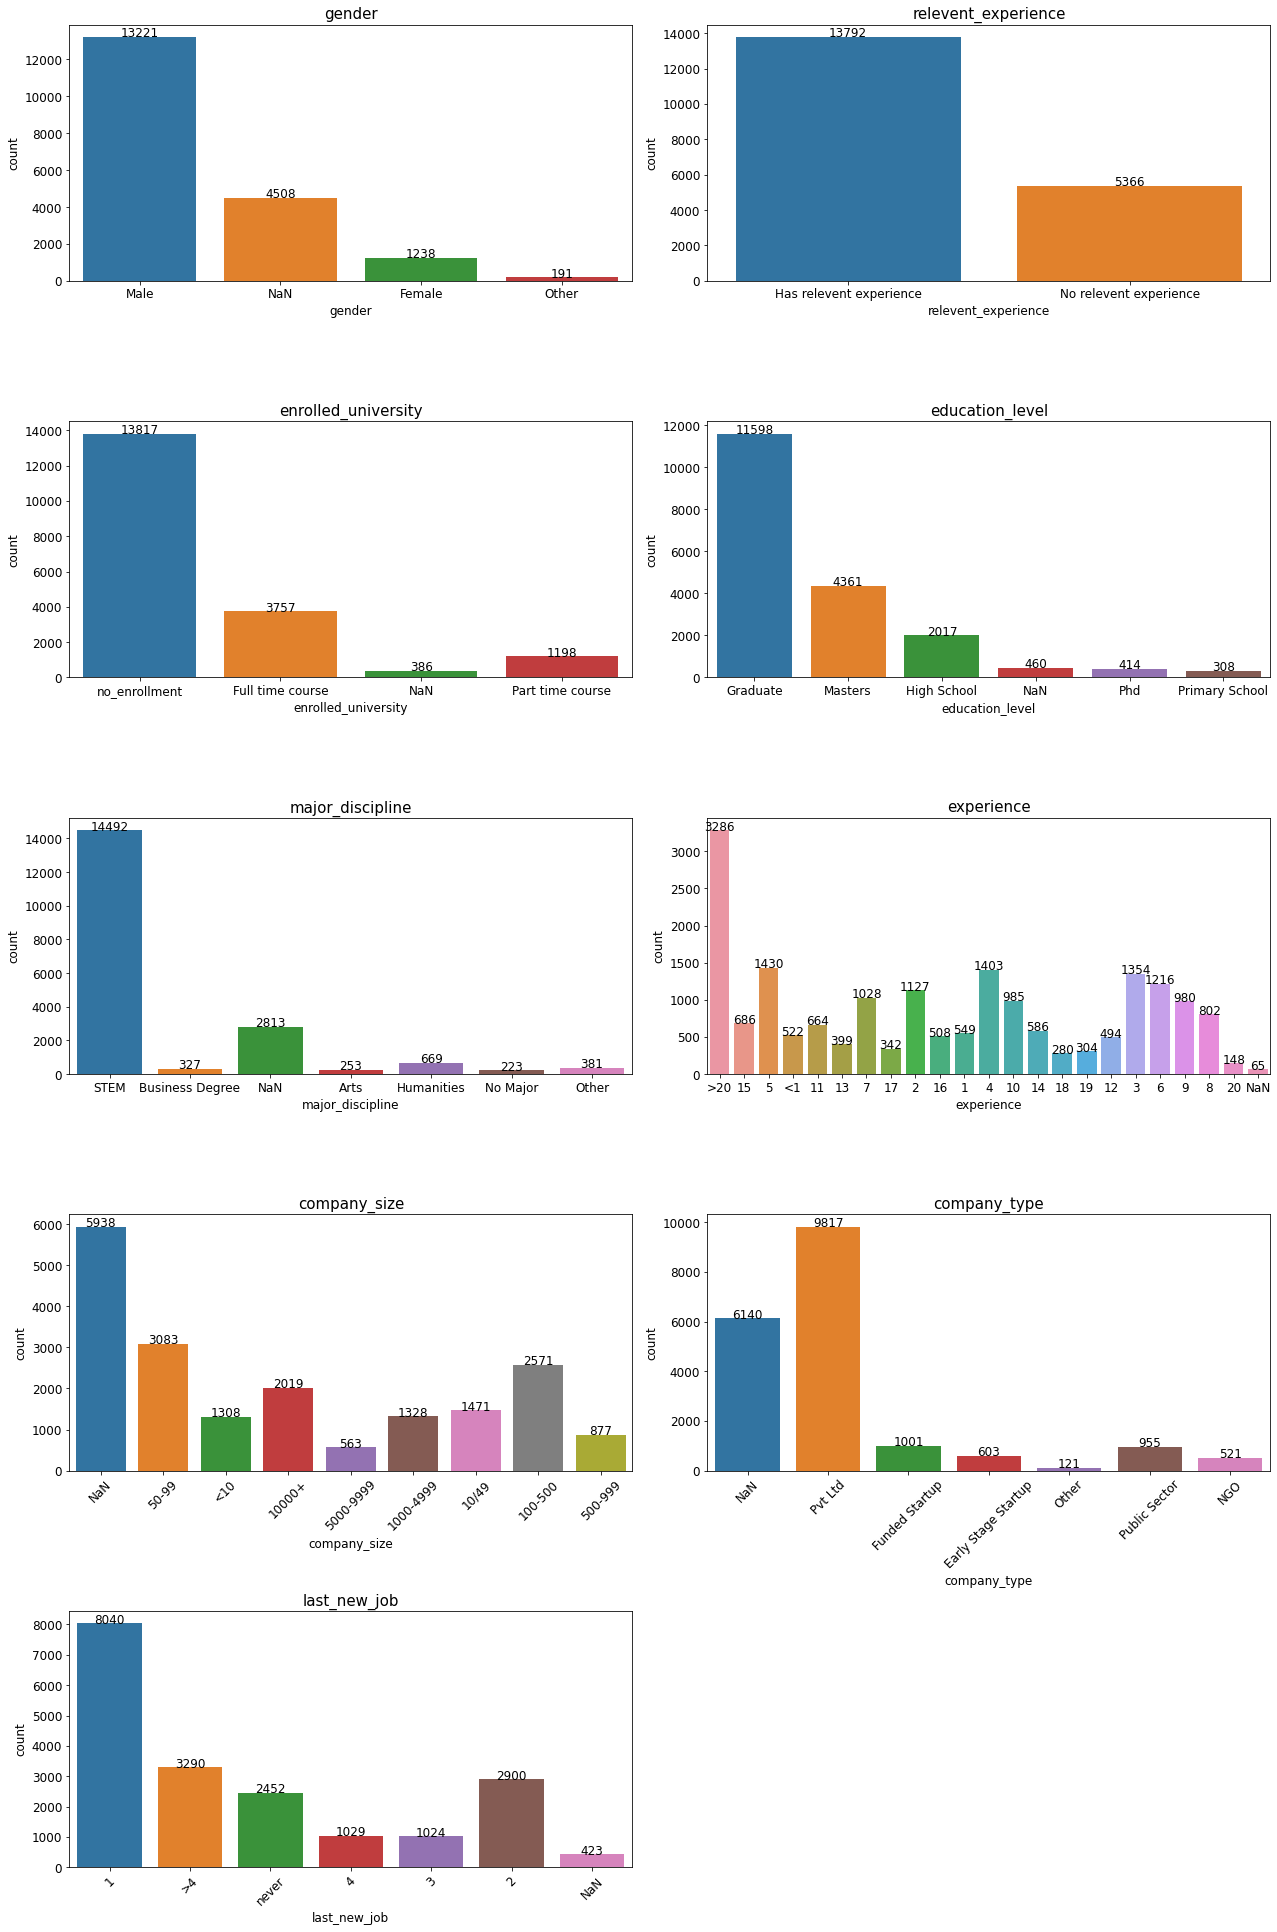

In [295]:
# Visualize data values
plt.figure(figsize=(18,27))
column_list = list(df.columns.values) [3:12]
A = 0
for i in column_list:
    A+=1
    plt.subplot(5,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >= 7:
        plt.xticks(rotation=45)
plt.tight_layout(h_pad=2)

## Data Distribution

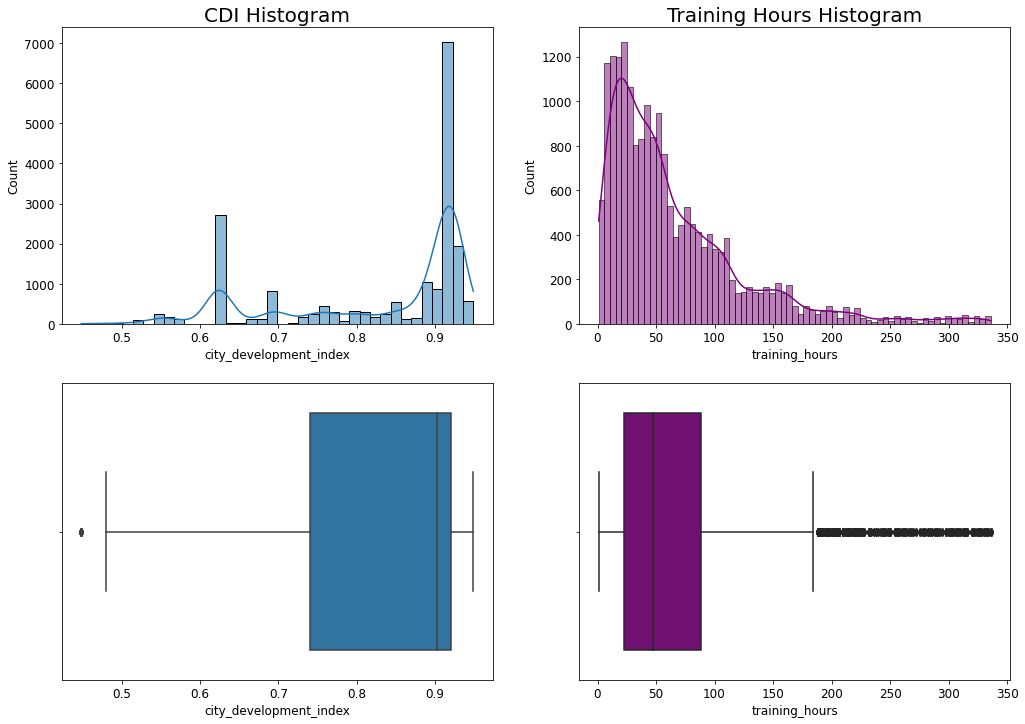

In [296]:
# Distribution of numerical data
plt.figure(figsize=(17,12))


plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'],kde=True)
plt.title('CDI Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(df['training_hours'],kde=True,color="purple")
plt.title('Training Hours Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(df['city_development_index'])

plt.subplot(224)
sns.boxplot(df['training_hours'],color="purple")

plt.show()

In [297]:
# Distribution normality test
numerical_feature = ['city_development_index','training_hours']

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

city_development_index : Not normal distribution
training_hours : Not normal distribution


* `city_development_index` and `training_hours` data are not following normal distribution. For numerical analysis we will use non parametric method.
* `training_hours` data mostly located in left side. It is normal because people are usually excited when doing training at the beginning but stop when they feel bored. 

## Data Correlation

### Spearman Correlation

In [298]:
# Correlation of numerical data
df_numerical = df.copy()
df_numerical["experience"] = np.where(df_numerical["experience"]=="<1",1,df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"]==">20",21,df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"]=="never",0,df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"]==">4",5,df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)
df_numerical.drop("enrollee_id",axis=1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


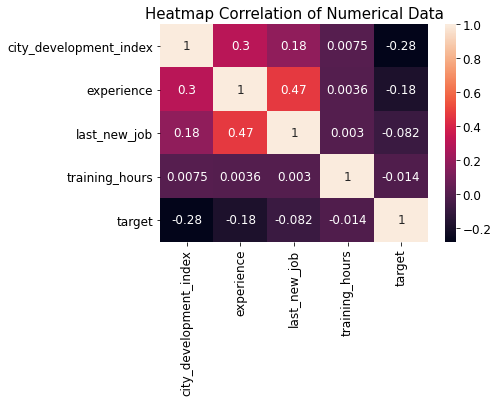

In [299]:
sns.heatmap(df_numerical.drop("enrollee_id",axis=1).corr("spearman"),annot=True)
plt.title("Heatmap Correlation of Numerical Data",fontsize=15)
plt.show()

From spearman correlation, last_new_job and experience has medium correlation (0.473), while others has weak correlation.  
To determine the predictive between features and target, we will use WOE and IV.

### Weight of Evidence (WOE) and Information Value (IV)
This dataset contains more data with catagorical type than numerical type. We will use nominal catagorical features for WOE and IV
    
    Information value, Predictive power
    < 0.02, useless for prediction
    0.02 - 0.1, weak predictor
    0.1 - 0.3, medium predictor
    0.3 - 0.5, strong predictor
    > 0.5, suspicious or too good

In [300]:
for i in df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours','experience','last_new_job','company_size']).columns:
    df_woe_iv = (pd.crosstab(df[i],df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

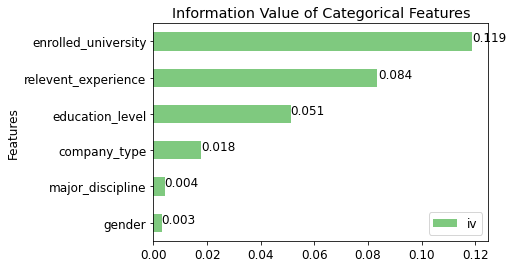

In [301]:
columns_cat = df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours','experience','last_new_job','company_size']).columns
iv = []
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i],df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by='iv')
df_iv.plot(kind='barh', title='Information Value of Categorical Features',colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index,
             str(value))
plt.legend(loc="lower right")
plt.show()

* From the graph above, we can see the order of features based on its predictive power towards target.  
* Based on its IV value, `enrolled_university` is a medium predictor, `relevent_experience` and `education_level` are weak predictor, and the others are useless for prediction.

## Identify Missing Values

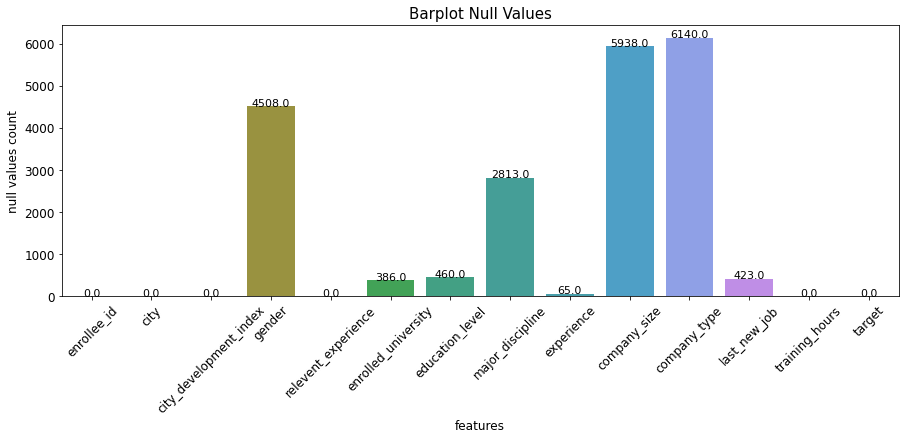

In [302]:
# Missing value percentage per column
null_df = df.isna().sum().reset_index()

ax = plt.figure(figsize=(15,5))

ax = sns.barplot(null_df['index'], null_df[0], palette='husl')
plt.xlabel('features', fontsize=12)
plt.ylabel('null values count', fontsize=12)
plt.xticks(rotation=45)
plt.title("Barplot Null Values",fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha='center', color='black', size=11)

plt.show()

This dataset have missing values in columns `gender`, `enrolled_university`, `education_level`, `major_discipline`, `experience`, `company_size`, `company_type`, and `last_new_job`

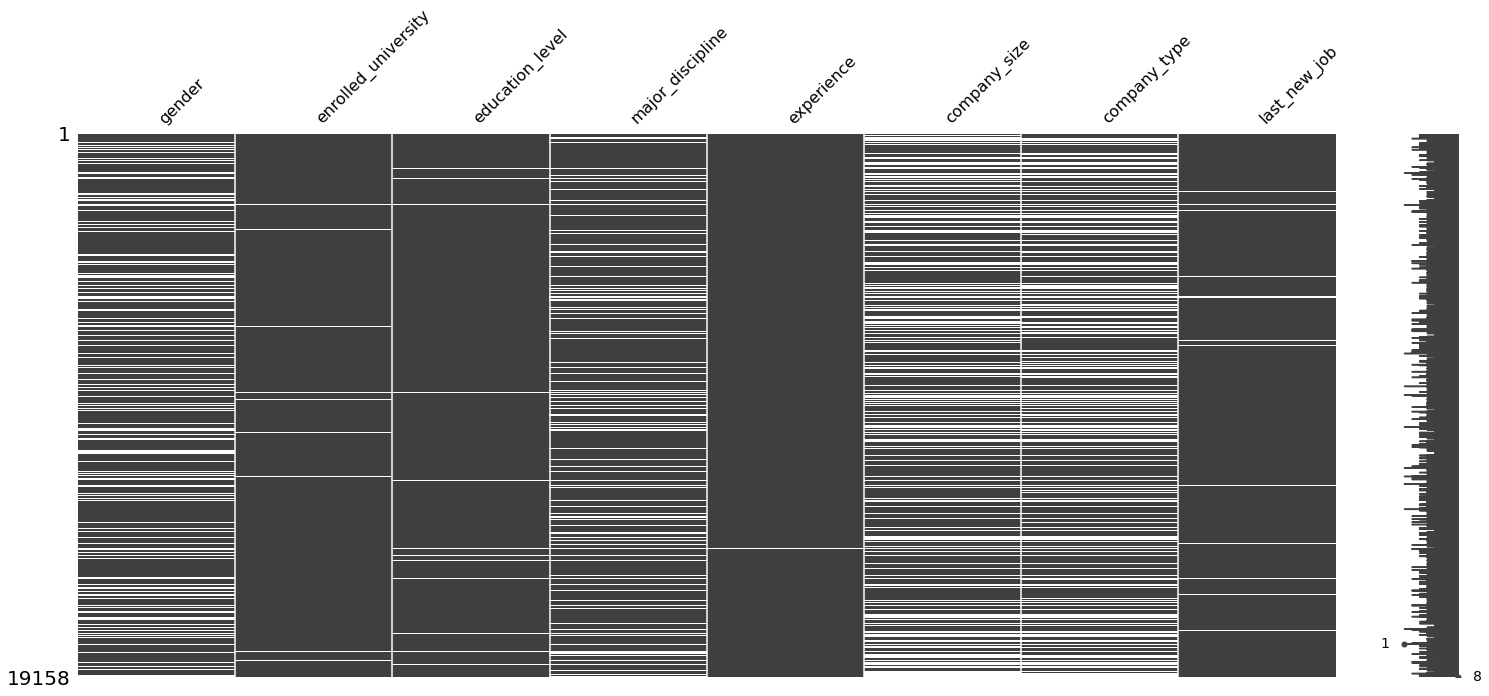

In [303]:
# Generate preview of entries with null values
df_nan = pd.DataFrame(df.isna().sum())

if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Missing values each columns have random pattern

## Identify Duplicate Data

In [304]:
# Check any duplicate data
df['enrollee_id'].duplicated().sum() #there is no duplicate data

0

## Identify Data Imbalance

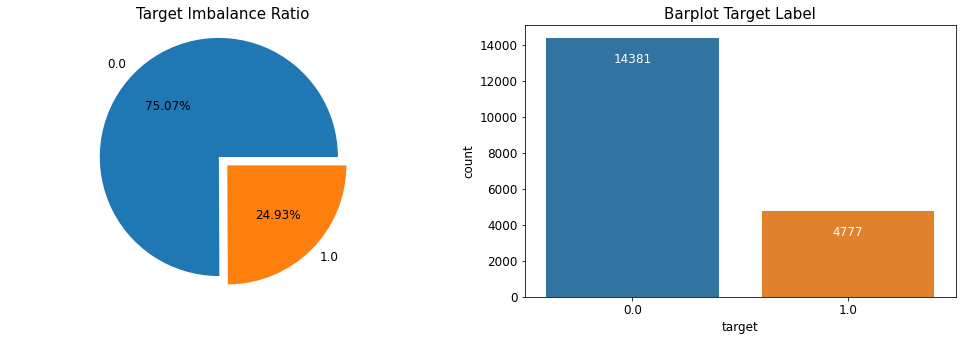

In [305]:
plt.figure(figsize=(17,(100)/20))

plt.subplot(121)
plt.pie(round(df['target'].value_counts()/len(df)*100,2),labels=list(df['target'].value_counts().index),autopct = "%.2f%%",explode = (0,0.1))
plt.axis("equal")
plt.title("Target Imbalance Ratio",size=15)

plt.subplot(122)
ax = sns.countplot(data=df, x='target')
plt.title("Barplot Target Label", fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)

Proportion of target is imbalance

**Metric selection:**  
<img src='imbalance.png'>

Because of target data is imbalance and we want to focus on class 1 and minimize type 1 error so we choose f0.5

# Data Analytics

## Data propotion based on target

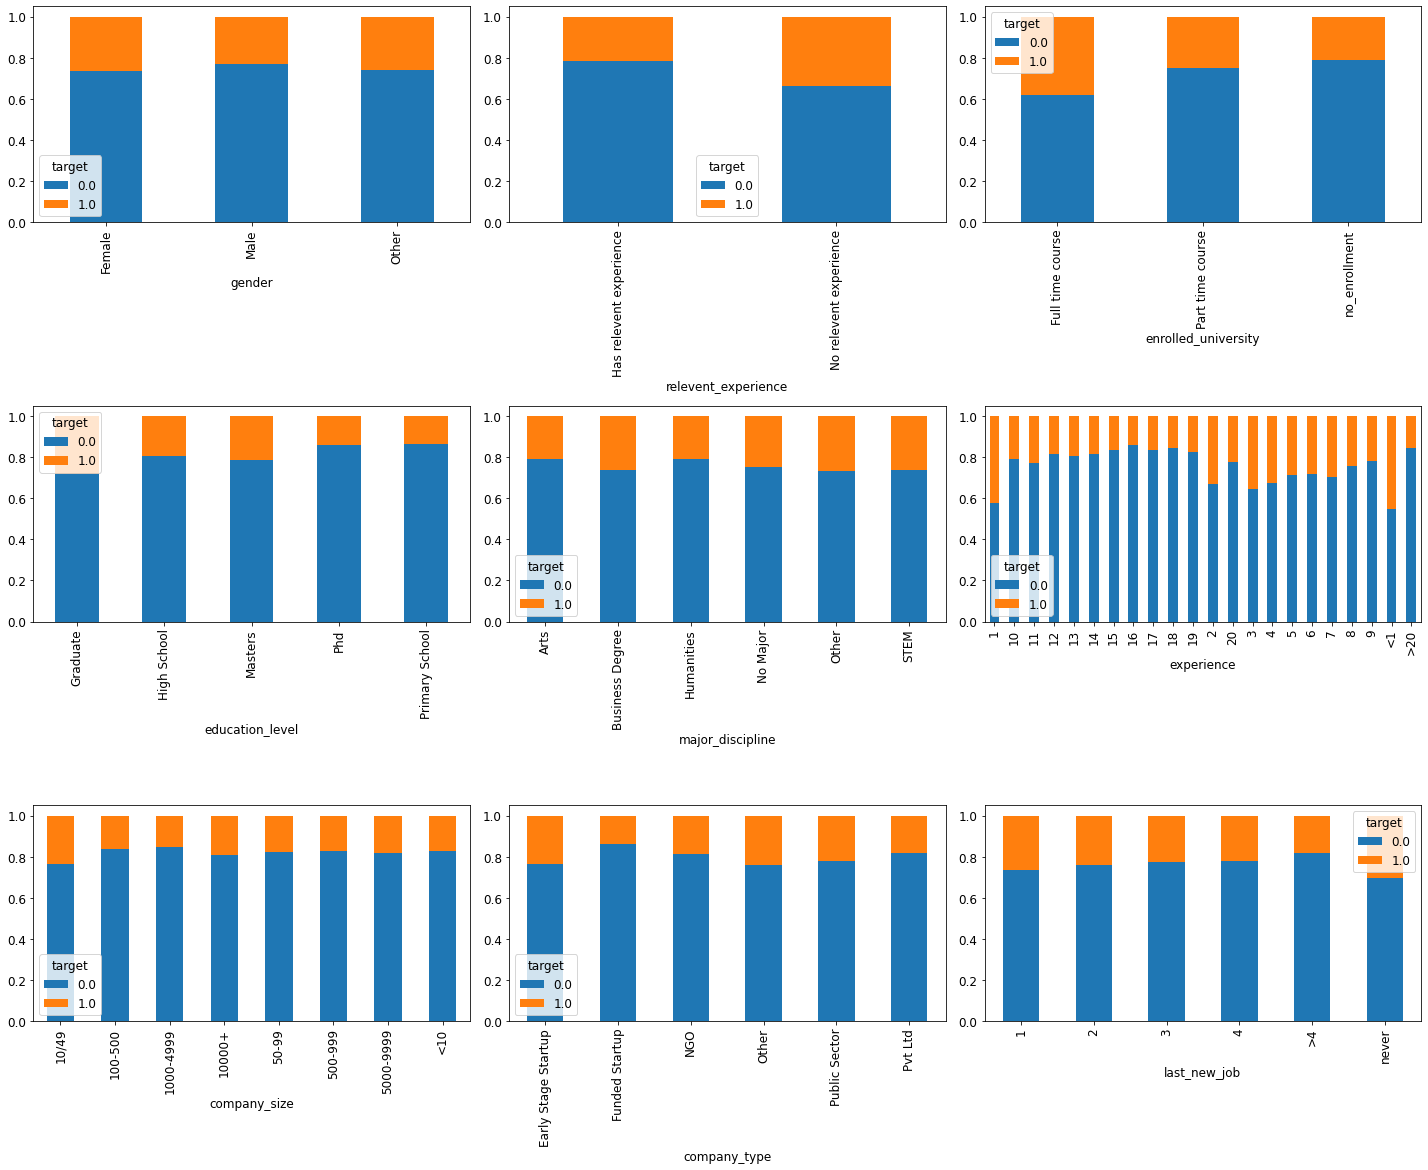

In [306]:
# Proportion of target in features
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours']).columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df[i],df['target'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()

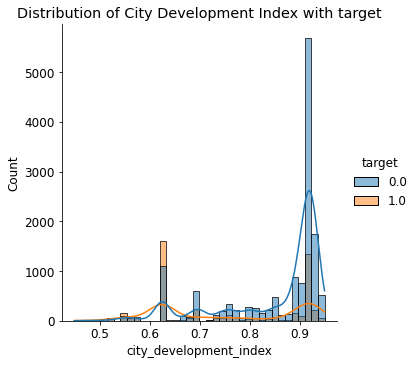

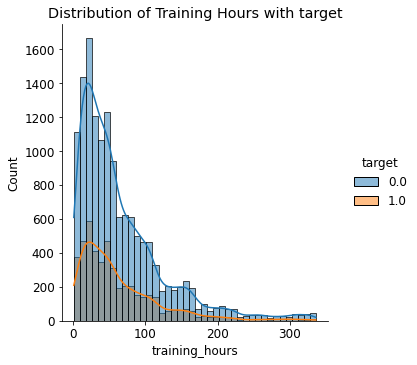

In [307]:
sns.displot(x='city_development_index',
            hue='target',
            data=df,
            stat="count",
            kde=True)
plt.title("Distribution of City Development Index with target")

sns.displot(x='training_hours',
            hue='target',
            data=df,
            stat="count",
            bins=40,
            kde=True)
plt.title("Distribution of Training Hours with target")
plt.show()

From the graph above we can see that in every feature, there is more candidates that are not looking for a job change (`target` 0) than those who are looking for a job change (`target` 1). This is aligned with the imbalance condition of `target` feature.

In [308]:
# Graphic Objects Plotly (Stacked Bar Chart)
df_target_0 = df[df['target']==0].groupby('city')['enrollee_id'].count().sort_values(ascending=False).reset_index().head(4)
df_target_1 = df[df['target']==1].groupby('city')['enrollee_id'].count().sort_values(ascending=False).reset_index().head(4)

fig=go.Figure()
#create first plot
fig.add_trace(go.Bar(x= df_target_1['city'],
                    y= df_target_1['enrollee_id'],
                    orientation='v',
                    name='Class 1',
                    hoverinfo='all'))

#create second plot
fig.add_trace(go.Bar(x= df_target_0['city'],
                    y= df_target_0['enrollee_id'],
                    orientation='v',
                    name='Class 0',
                    hoverinfo='all'))
fig.update_layout(barmode='stack', width=800, height=400, title='Top 5 Cities')
fig.show()

In [309]:
# Identify shared information between city and city_development_index
print('N unique data in city_development_index:',df['city_development_index'].nunique())
print('N unique data in city:',df['city'].nunique())

N unique data in city_development_index: 93
N unique data in city: 123


From the data exploration, we can see that:
* Top 5 `city` where the candidates come from are city_103, city_21, city_16, city_114, city_160, in which city_21 has more class 1 candidates than city_103
* All candidates that come from city 160 are class 1 candidates (looking for a job change)
* With 123 cities and 93 unique citi_development_index, we can see that there are some cities that shares same CDI value

## Independent Test with Chi-squared


Hypothesis
* Ho : There is no relation between feature and target
* Ha : There is a relation between feature and target

### Relation between feature and target

In [310]:
object_list = list(df.select_dtypes(include=object).columns)
for i in object_list:
    chisqt = pd.crosstab(df["target"], df[i], margins=True)
    value = np.array([chisqt.iloc[0],
                      chisqt.iloc[1]])
    stat,pval,dof,exp = chi2_contingency(value)
    alpha = 0.05
    if pval <= alpha:
        print(i, ": Dependent (reject H0)")
    else:
        print(i, ": Independent (H0 holds true)")

city : Dependent (reject H0)
gender : Dependent (reject H0)
relevent_experience : Dependent (reject H0)
enrolled_university : Dependent (reject H0)
education_level : Dependent (reject H0)
major_discipline : Independent (H0 holds true)
experience : Dependent (reject H0)
company_size : Dependent (reject H0)
company_type : Dependent (reject H0)
last_new_job : Dependent (reject H0)


Only `major_discipline` has no relation to target 

### Relation between feature and feature

#### Education

In [311]:
education= ['enrolled_university', 'education_level', 'major_discipline']
skip = []

for i in education:
    for x in education:
        if i == x or x in skip:
            continue
        else:
            stats, pval, dof, expected = chi2_contingency(pd.crosstab(df[i], df[x]))
            # conclusion
            if pval <= 0.05:
                print(f'Dependent (reject H0), {i} has relation with {x}')
            else:
                print(f'Independent (H0 holds true), {i} has no  relation with {x}')
    skip.append(i)

Dependent (reject H0), enrolled_university has relation with education_level
Dependent (reject H0), enrolled_university has relation with major_discipline
Dependent (reject H0), education_level has relation with major_discipline


We can use `enrolled_university`, `education_level`, `major_discipline` to fill missing values for each others

#### Company

In [312]:
company= ['company_size', 'company_type', 'enrolled_university']
skip = []

for i in company:
    for x in company:
        if i == x or x in skip:
            continue
        else:
            stats, pval, dof, expected = chi2_contingency(pd.crosstab(df[i], df[x]))
            # conclusion
            if pval <= 0.05:
                print(f'Dependent (reject H0), {i} has relation with {x}')
            else:
                print(f'Independent (H0 holds true), {i} has no  relation with {x}')
    skip.append(i)

Dependent (reject H0), company_size has relation with company_type
Dependent (reject H0), company_size has relation with enrolled_university
Dependent (reject H0), company_type has relation with enrolled_university


We can use `company_size`, `company_type`, `enrolled_university` to fill missing values for each others

#### Last New Job

In [313]:
company= ['last_new_job','experience','enrolled_university']
skip = []

for i in company:
    for x in company:
        if i == x or x in skip:
            continue
        else:
            stats, pval, dof, expected = chi2_contingency(pd.crosstab(df[i], df[x]))
            # conclusion
            if pval <= 0.05:
                print(f'Dependent (reject H0), {i} has relation with {x}')
            else:
                print(f'Independent (H0 holds true), {i} has no  relation with {x}')
    skip.append(i)

Dependent (reject H0), last_new_job has relation with experience
Dependent (reject H0), last_new_job has relation with enrolled_university
Dependent (reject H0), experience has relation with enrolled_university


We can use `last_new_job`,`enrolled_university` and `experience` to fill missing values for each others

# Preprocessing

## Fill Missing Values

### Major discipline

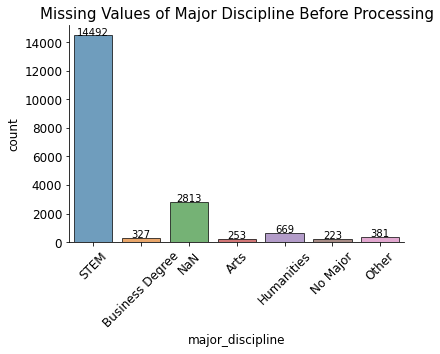

In [314]:
sns.countplot(data=df.fillna('NaN'), x='major_discipline', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.title("Missing Values of Major Discipline Before Processing",fontsize=15)
plt.show()

In [315]:
# Missing values of major discipline
print('Current missing value:', df['major_discipline'].isna().sum())
df[df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 2813


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

All of candidate with `high school` and `primary school` `education_level` entry `NaN` values for `major_discipline`, thus we will fill their `major_discipline` to `NA Non Degree`

In [316]:
nan_index=(df[(df['major_discipline'].isna()) & ((df['education_level']=='High School') | (df['education_level']=='Primary School'))]).index
df['major_discipline'][nan_index]='NA Non Degree'

In [317]:
print('Current missing value:', df['major_discipline'].isna().sum())
df['major_discipline'].value_counts(dropna=False)

Current missing value: 488


STEM               14492
NA Non Degree       2325
Humanities           669
NaN                  488
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

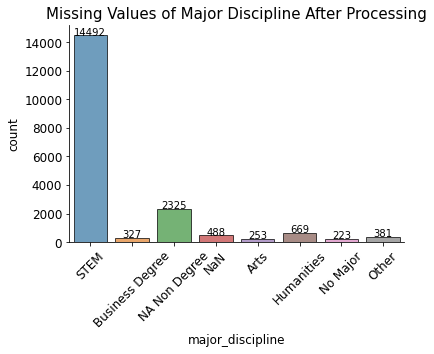

In [318]:
sns.countplot(data=df.fillna('NaN'), x='major_discipline', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.title("Missing Values of Major Discipline After Processing",fontsize=15)
plt.show()

`high school` and `primary school` graduates successfully changed to `NA Non Degree`

### Enrolled University

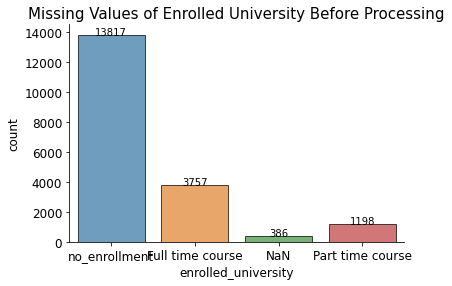

In [319]:
sns.countplot(data=df.fillna('NaN'), x='enrolled_university', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.title("Missing Values of Enrolled University Before Processing",fontsize=15)
plt.show()

In [320]:
df[df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidate who has `Primary School` `education_level` are not qualified to enroll university. So we will fill their `NaN` entry in `enrolled_university` to `Primary Grad`.

In [321]:
nan_index=(df[(df['enrolled_university'].isna()) & (df['education_level']=='Primary School')]).index
df['enrolled_university'][nan_index]='Primary Grad'

In [322]:
print('Current missing value:', df['enrolled_university'].isna().sum())
df[df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 377


Graduate       171
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

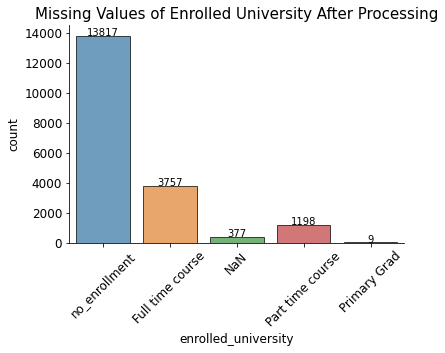

In [323]:
sns.countplot(data=df.fillna('NaN'), x='enrolled_university', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.title("Missing Values of Enrolled University After Processing",fontsize=15)
plt.xticks(rotation=45)
plt.show()

`Primary School` candidate successfully changed to `Primary Grad`.

### Company Size/Company Type

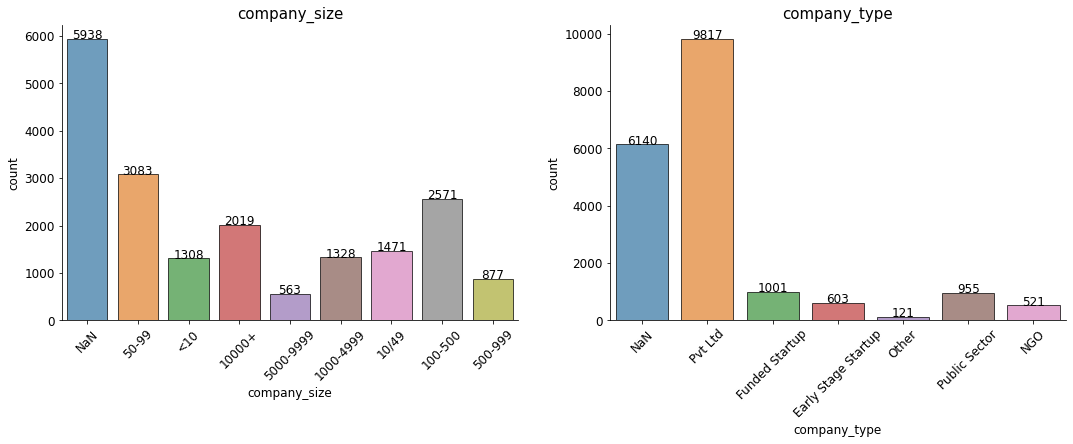

In [324]:
plt.figure(figsize=(18,25))
column_list = ['company_size','company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i, alpha=0.7, edgecolor='black')
    sns.despine()
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >=0:
        plt.xticks(rotation=45)

In [325]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [326]:
df[(df['company_size'].isna()) & (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

no_enrollment       3009
Full time course    1846
Part time course     288
NaN                  208
Primary Grad           9
Name: enrolled_university, dtype: int64

Candidates enrolling `Full time course` in `enrolled_university` are not likely to work for a company. So we will set their `NaN`entry in `company_size` and `company_type` to `No Employment`.

In [327]:
nan_index=(df[(df['company_size'].isna()) & (df['company_type'].isna()) & (df['enrolled_university']=='Full time course')]).index
df['company_size'][nan_index]='No Employment'
df['company_type'][nan_index]='No Employment'

In [328]:
print('Current missing value company_size:', df['company_size'].isna().sum())
print('Current missing value company_type:', df['company_type'].isna().sum())
df[(df['company_size'].isna()) & (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

Current missing value company_size: 4092
Current missing value company_type: 4294


no_enrollment       3009
Part time course     288
NaN                  208
Primary Grad           9
Name: enrolled_university, dtype: int64

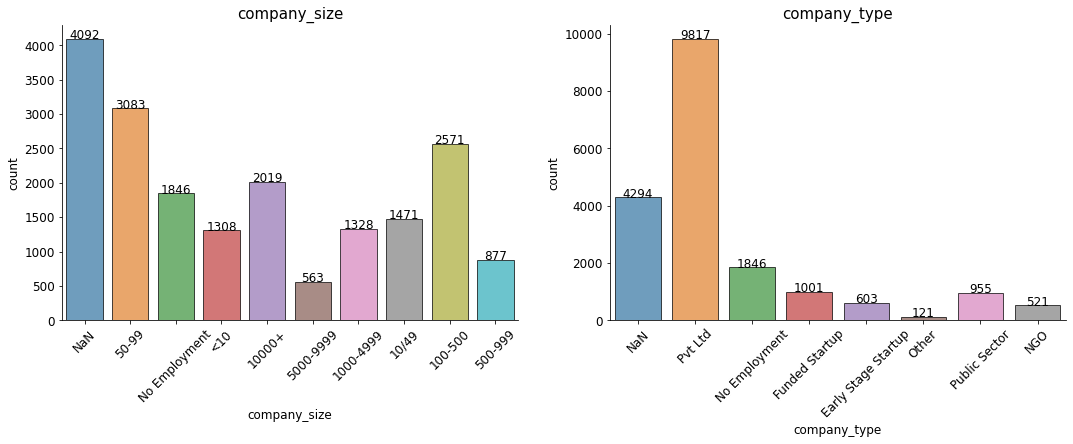

In [329]:
plt.figure(figsize=(18,25))
column_list = ['company_size','company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i, alpha=0.7, edgecolor='black')
    plt.title(i, fontsize=15)
    sns.despine()
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >=0:
        plt.xticks(rotation=45)

`Full time course` candidate successfully changed to `No Employment`.

### Last New Job

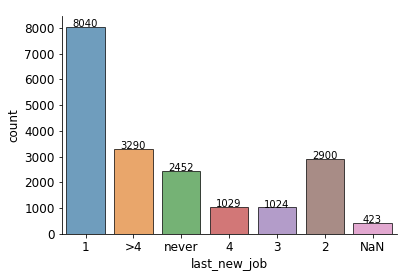

In [330]:
sns.countplot(data=df.fillna('NaN'), x='last_new_job', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

In [331]:
df[df['last_new_job'].isna()]['experience'].value_counts(dropna=False)

3      58
4      53
<1     38
2      37
5      34
>20    33
1      32
NaN    24
6      22
9      15
7      15
8      12
10      8
16      8
12      6
11      5
13      5
19      5
18      4
14      4
15      2
17      2
20      1
Name: experience, dtype: int64

Candidates having `<1` year of `experience` are not likely to have `last_new_job`. So we will fill the `NaN` values with `never`

In [332]:
df[(df['last_new_job'].isna()) & (df['experience']=='<1')]['enrolled_university'].value_counts(dropna=False)

no_enrollment       15
Full time course    15
NaN                  5
Part time course     3
Name: enrolled_university, dtype: int64

Candidates having `<1` year of `experience` and currenty `enrolled_university` at `Full time course` are not likely to have `last_new_job`. So we will fill the `NaN` values with `never`

In [333]:
nan_index=(df[(df['last_new_job'].isna()) & ((df['experience']=='<1') & (df['enrolled_university']=='Full time course'))]).index
df['last_new_job'][nan_index]='never'

In [334]:
print('Current missing value:', df['last_new_job'].isna().sum())
df[(df['last_new_job'].isna()) & (df['experience']=='<1')]['enrolled_university'].value_counts(dropna=False)

Current missing value: 408


no_enrollment       15
NaN                  5
Part time course     3
Name: enrolled_university, dtype: int64

`<1` year of `experience` and `Full time course` candidates successfully changed to `never`.

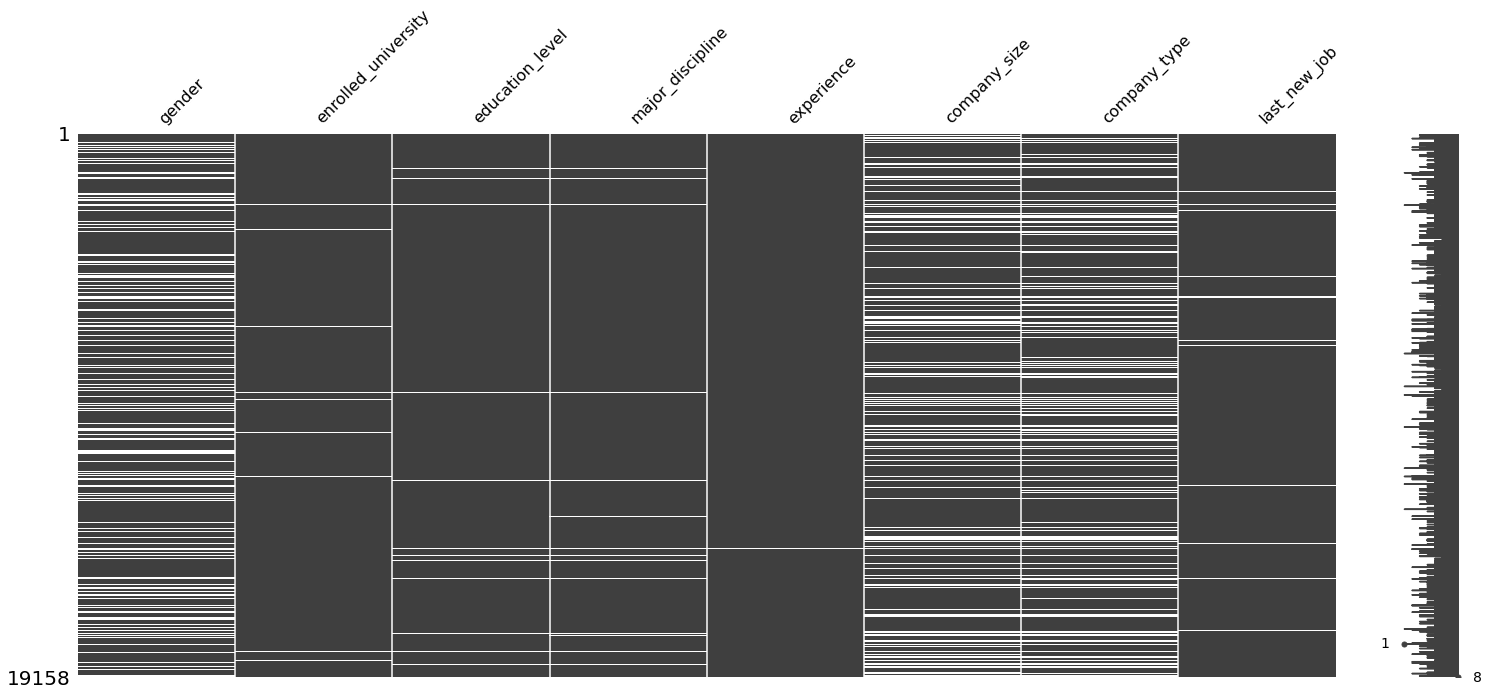

In [335]:
# Generate preview of entries with null values after NaN analysis
if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

In [336]:
# Fill the rest of NaN values with simpleimputer
imputer_cons=SimpleImputer(strategy="constant",fill_value="Not Provided")
df[["education_level","company_size","company_type","enrolled_university","experience","last_new_job",'major_discipline']]=imputer_cons.fit_transform(df[["education_level","company_size","company_type","enrolled_university","experience","last_new_job",'major_discipline']])

## Data Inconsistency

In [337]:
# Make data more neat to read
df['enrolled_university'] = df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [338]:
# Correctiong punctuation
df['company_size'] = df['company_size'].replace('10/49','10-49')

## Feature Engineering

**Encoding**  
* One hot encoder : gender, company_type, major_discipline, enrolled_university
* Ordinal encoder : relevent_experience, education_level, experience, company_size, last_new_job   

In [339]:
df['company_size'].value_counts(dropna=False)

Not Provided     4092
50-99            3083
100-500          2571
10000+           2019
No Employment    1846
10-49            1471
1000-4999        1328
<10              1308
500-999           877
5000-9999         563
Name: company_size, dtype: int64

In [340]:
# Ordinal Mapping Dictionary

le = LabelEncoder()
le.fit(df['city'])

ordinal_mapping = [
    {'col':'relevent_experience',
    'mapping':{
        'Has relevent experience': 1,
        'No relevent experience': 0
    }},
    {'col':'education_level',
    'mapping':{
        'Primary School' : 0,
        'High School': 1,
        'Graduate'   : 2, 
        'Masters'    : 3, 
        'Phd'        : 4
    }},
    {'col':'experience',
    'mapping':{
        '<1'      :    0,
        '1'       :    1, 
        '2'       :    2, 
        '3'       :    3, 
        '4'       :    4, 
        '5'       :    5,
        '6'       :    6,
        '7'       :    7,
        '8'       :    8, 
        '9'       :    9, 
        '10'      :    10, 
        '11'      :    11,
        '12'      :    12,
        '13'      :    13, 
        '14'      :    14, 
        '15'      :    15, 
        '16'      :    16,
        '17'      :    17,
        '18'      :    18,
        '19'      :    19, 
        '20'      :    20, 
        '>20'     :    21
    }},
    {'col':'company_size',
    'mapping':{
        '<10'          : 0,
        '10-49'        : 1, 
        '50-99'        : 2,
        '100-500'      : 3, 
        '500-999'      : 4, 
        '1000-4999'    : 5, 
        '5000-9999'    : 6,
        '10000+'       : 7      
    }},
    {'col':'last_new_job',
    'mapping':{
        'never'        :    0,
        '1'            :    1, 
        '2'            :    2, 
        '3'            :    3, 
        '4'            :    4, 
        '>4'           :    5
    }},
    {'col':'city',
    'mapping':dict(zip(le.classes_, range(len(le.classes_))))
    }
]

In [341]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['company_type', 'major_discipline', 'enrolled_university']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['city','relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

In [342]:
transformer_cat = ColumnTransformer([
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['city','relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

## Feature selection

We will use feature : 
city_development_index', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours'  
<br> We will drop `gender` because it has low IV value and has relation with target based on statistic test. Additionaly, it can lead to discriminatory result
<br> We still keep `major_discipline` although it has no relation to target because it may contain information for other features

Target : 'target'

In [343]:
x = df.drop(columns=['enrollee_id','target','gender'])
y = df['target']

# Model Selection

We will try several models:
* Logistic Regression
* KNN 
* Decision Tree
* Random Forest
* XGBoost
* Catboost

## Splitting Data

In [344]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=.2,random_state=2020)

## Model Benchmarking

In [345]:
# Model variables
logreg = LogisticRegression(max_iter=100, random_state=2020)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=3, random_state=2020)
rf = RandomForestClassifier(random_state=2020)
xgb = XGBClassifier()

# Catboost model
x_train_ord = pd.DataFrame(transformer_cat.fit_transform(x_train),columns=transformer_cat.get_feature_names())
x_test_ord = pd.DataFrame(transformer_cat.transform(x_test),columns=transformer_cat.get_feature_names())

CAT_FEATURES = ['company_type', 'major_discipline', 'enrolled_university'] 
catboost_model = CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES,verbose=False)

In [346]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score=[]
rata=[]
std=[]
fhalf_scorer = make_scorer(fbeta_score, beta=0.5)

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    if i == 'catboost_model':
        model_cv=cross_val_score(catboost_model,x_train_ord,y_train,cv=skfold,scoring=fhalf_scorer)
    else:
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=fhalf_scorer)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],'mean f0.5':rata,'sdev':std}).set_index('model').sort_values(by='mean f0.5',ascending=False)

[10:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,mean f0.5,sdev
model,,
Catboost,0.588775,0.012239
XGBoost,0.564736,0.012407
Random Forest,0.558330,0.005372
Decision Tree,0.538511,0.029206
KNN,0.438909,0.015520
Logistic Regression,0.425720,0.006648


### Model Benchmarking: Data test

In [347]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score_roc_auc = []
score_f1 = []

def y_pred_func(i):
    if i == 'catboost_model':
        estimator = catboost_model
        x_train2,x_test2 = x_train_ord,x_test_ord
    else:
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        x_train2,x_test2 = x_train,x_test
    
    estimator.fit(x_train2,y_train)
    return(estimator,estimator.predict(x_test2),x_test2)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost']):
    estimator,y_pred,x_test2 = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test2)[:,1]
    score_f1.append(fbeta_score(y_test,y_pred,beta=0.5))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],
             'f0.5 score':score_f1}).set_index('model').sort_values(by='f0.5 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      2877
         1.0       0.52      0.23      0.32       955

    accuracy                           0.76      3832
   macro avg       0.65      0.58      0.58      3832
weighted avg       0.72      0.76      0.72      3832

KNN 
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      2877
         1.0       0.48      0.34      0.39       955

    accuracy                           0.74      3832
   macro avg       0.64      0.61      0.62      3832
weighted avg       0.72      0.74      0.73      3832

Decision Tree 
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      2877
         1.0       0.57      0.39      0.46       955

    accuracy                           0.78      3832
   macro avg       0.69      0.65      0.66      3832
weighted avg       0.76      0

,f0.5 score
model,
Catboost,0.575956
XGBoost,0.574028
Random Forest,0.537041
Decision Tree,0.523663
KNN,0.440088
Logistic Regression,0.416189


### Performance Comparison: Data train & Data test

In [348]:
def confusion_matrix_table(y_test,y_pred):
    cf = confusion_matrix(y_test, y_pred)
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf.flatten()]

    names =  ['TN', 'FP', 'FN','TP']
    perc = ["{0:.2%}".format(value) for value in
                         cf.flatten()/np.sum(cf)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(names, perc, group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    
    return cf,labels

[10:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


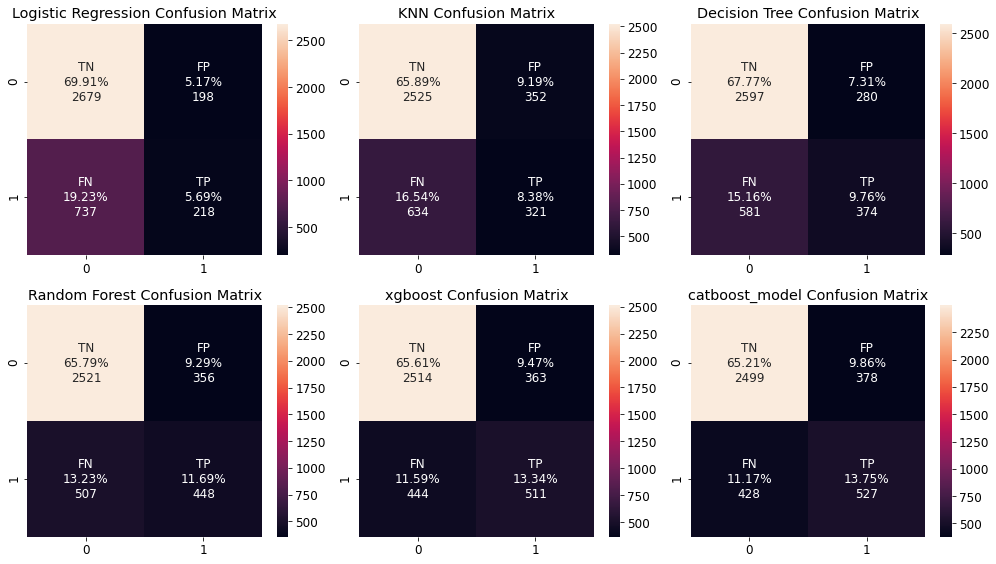

In [349]:
count = 0
models = [logreg,knn,dt,rf,xgb,'catboost_model']
fig = plt.figure(figsize=(14,8))

for i,j in zip(models,['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','xgboost','catboost_model']):
    
    estimator,y_pred,x_test2 = y_pred_func(i)
    
    count += 1
    cf,labels = confusion_matrix_table(y_test,y_pred)
    ax= plt.subplot(2,3,count)

    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cf, annot=labels, fmt='').set_title(f"{j} Confusion Matrix")
    fig.tight_layout()

In [350]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','XGBoost','Catboost'],
              'Mean Score F0.5 Cross Validation':rata,
             'Mean Score F0.5 Data Test':score_f1}).set_index('model').sort_values(by='Mean Score F0.5 Cross Validation',ascending=False)

,Mean Score F0.5 Cross Validation,Mean Score F0.5 Data Test
model,,
Catboost,0.588775,0.575956
XGBoost,0.564736,0.574028
Random Forest,0.558330,0.537041
Decision Tree,0.538511,0.523663
KNN,0.438909,0.440088
Logistic Regression,0.425720,0.416189


In [351]:
y_pred = catboost_model.predict(x_test_ord)
cr_bm = classification_report(y_test,y_pred)
print(cr_bm) 

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2877
         1.0       0.58      0.55      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.71      3832
weighted avg       0.79      0.79      0.79      3832



Catboost gives best performances based on Data train and Data test, so we will continue using catboost model

## Imbalance data handling

### Method Benchmarking

In [352]:
cv_score = []

model_main= CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES, 
                                   verbose=False)

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

model_balanced = CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES, 
                                   verbose=False,class_weights=class_weights)

def y_pred_resample(model_name):
        
    if i == 'smote':
        sm = SMOTENC(categorical_features= [True if i in CAT_FEATURES else False for i in x_train_ord.columns], random_state=0)
        x_train_res, y_train_res = sm.fit_resample(x_train_ord, y_train)
        model = model_main
    
    else:
        x_train_res, y_train_res = x_train_ord,y_train
        model = model_balanced
    
    return(x_train_res, y_train_res,model)

for i in ['smote','class weight']:
    x_train_res, y_train_res,model = y_pred_resample(i)
    skfold= StratifiedKFold(n_splits=5)
    model_cv=cross_val_score(model,x_train_res,y_train_res,cv=skfold,scoring=fhalf_scorer)
    cv_score.append(model_cv.mean())

In [353]:
pd.DataFrame({'model':['SMOTENC','Class Weight'],
             'cv score f0.5':cv_score}).set_index('model').sort_values(by='cv score f0.5',ascending=False)

,cv score f0.5
model,
SMOTENC,0.826825
Class Weight,0.576533


smote 
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2877
         1.0       0.58      0.61      0.60       955

    accuracy                           0.79      3832
   macro avg       0.72      0.73      0.73      3832
weighted avg       0.80      0.79      0.79      3832

class_weight 
               precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      2877
         1.0       0.53      0.74      0.62       955

    accuracy                           0.77      3832
   macro avg       0.72      0.76      0.73      3832
weighted avg       0.81      0.77      0.78      3832



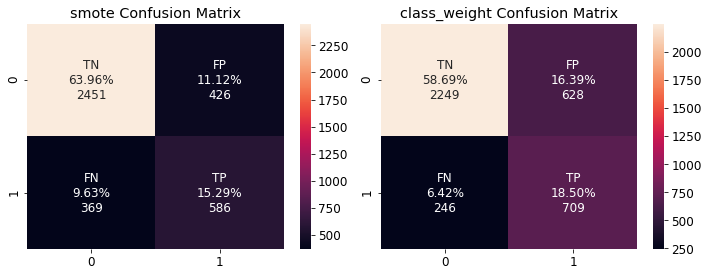

In [354]:
model_balanced = CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES, 
                                    verbose=False,
                                   class_weights=class_weights)

imb_test_score = []
count = 0
fig = plt.figure(figsize=(10,4))

for i in ['smote','class_weight']:
    
    x_train_res, y_train_res,model = y_pred_resample(i)
    model.fit(x_train_res, y_train_res)
    
    y_pred=model.predict(x_test_ord)
    imb_test_score.append(fbeta_score(y_test,y_pred,beta=0.5))
    print(i,'\n', classification_report(y_test,y_pred))
    
    count += 1
    cf,labels = confusion_matrix_table(y_test,y_pred)
    ax= plt.subplot(1,2,count)

    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cf, annot=labels, fmt='').set_title(f"{i} Confusion Matrix")
    fig.tight_layout()


In [355]:
pd.DataFrame({'model':['SMOTE','Class Weight'],
             'cv score':cv_score,
             'f0.5 score':imb_test_score}).set_index('model').sort_values(by='f0.5 score',ascending=False)

,cv score,f0.5 score
model,,
SMOTE,0.826825,0.585649
Class Weight,0.576533,0.562431


### Undersampling

In [356]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_under,y_under = rus.fit_resample(x_train,y_train)

In [357]:
print("Before under sampling\n",y_train.value_counts())
print("After under sampling\n",y_under.value_counts())

Before under sampling
 0.0    11504
1.0     3822
Name: target, dtype: int64
After under sampling
 1.0    3822
0.0    3822
Name: target, dtype: int64


In [358]:
model_under=Pipeline([
    ("resampling",rus),
    ("model",CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES,verbose=False))
])

In [359]:
model_under.fit(x_train_ord,y_train)
y_pred=model_under.predict(x_test_ord)
fhalf_rus = fbeta_score(y_test,y_pred,beta=0.5)
print(f"F0.5 undersampling: {fhalf_rus}")
cr_rus = classification_report(y_test,y_pred)
print(cr_rus)

F0.5 undersampling: 0.5630525825965566
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      2877
         1.0       0.53      0.76      0.62       955

    accuracy                           0.77      3832
   macro avg       0.72      0.77      0.73      3832
weighted avg       0.81      0.77      0.78      3832



In [360]:
pd.DataFrame({'model':['SMOTE','Class Weight',"Random Undersampling"],
             'f0.5 score':[imb_test_score[0],imb_test_score[1],fhalf_rus]}).set_index('model').sort_values(by='f0.5 score',ascending=False)

,f0.5 score
model,
SMOTE,0.585649
Random Undersampling,0.563053
Class Weight,0.562431


For handling the imbalance condition, SMOTENC have overfitting condition and Random undersampling get best performance

### Before imbalance handling vs after imbalance handling 

In [361]:
pd.DataFrame({'model':['Catboost Benchmark','Catboost Class Weight'],
             'f0.5 score':[score_f1[-1],fhalf_rus],
             }).set_index('model').sort_values(by='f0.5 score',ascending=False)

,f0.5 score
model,
Catboost Benchmark,0.575956
Catboost Class Weight,0.563053


In [362]:
print(f'''Classification report Catboost benchmark
{cr_bm}

Classification report Catboost class_weighted
{cr_rus}
''')

Classification report Catboost benchmark
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2877
         1.0       0.58      0.55      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.71      3832
weighted avg       0.79      0.79      0.79      3832


Classification report Catboost class_weighted
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      2877
         1.0       0.53      0.76      0.62       955

    accuracy                           0.77      3832
   macro avg       0.72      0.77      0.73      3832
weighted avg       0.81      0.77      0.78      3832




From the result we will use Catboost default

# Model Tunning

In [363]:
estimator = catboost_model

## Hyperparameter tunning

In [364]:
hyperparam_space={
    'depth':[3,4,6],
    'learning_rate': [0.01,0.05,0.1,0.5],
    'n_estimators':[50,100,200]
}

In [365]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring=fhalf_scorer,
    n_jobs=-1                                       
)

In [366]:
grid_search.fit(x_train_ord,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5911779623981899
{'depth': 4, 'learning_rate': 0.5, 'n_estimators': 100}


In [367]:
# Score after tunning
best_model=grid_search.best_estimator_
best_model.fit(x_train_ord, y_train)

y_pred_tunning = best_model.predict(x_test_ord)

f1_tun = fbeta_score(y_test,y_pred_tunning,beta=0.5)

cr_tun = classification_report(y_test,y_pred_tunning)
print("F0.5 score after tunning: ",f1_tun)
print("\n",cr_tun)

F0.5 score after tunning:  0.585963363495917

               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      2877
         1.0       0.59      0.56      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.72      3832
weighted avg       0.79      0.79      0.79      3832



<Figure size 360x288 with 0 Axes>

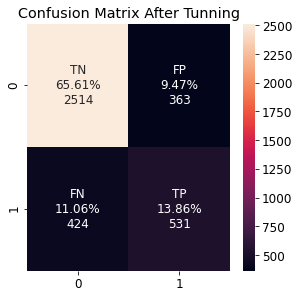

In [368]:
fig = plt.figure(figsize=(5,4))
cf,labels = confusion_matrix_table(y_test,y_pred_tunning)

plt.figure(figsize=(10,10))
ax= plt.subplot(2,2,count)
plt.rcParams.update({'font.size': 12})
sns.heatmap(cf, annot=labels, fmt='').set_title(f"Confusion Matrix After Tunning")
fig.tight_layout()

## Before tunning vs after tunning

In [369]:
pd.DataFrame({'model':['Catboost','Catboost with tunning'],
             'F1 score':[score_f1[-1],f1_tun]
             }).set_index('model').sort_values(by='F1 score',ascending=False)

,F1 score
model,
Catboost with tunning,0.585963
Catboost,0.575956


In [423]:
print(f'''Classification report Catboost before tunning
{cr_bm}

Classification report Catboost after tunning
{cr_tun}
''')

Classification report Catboost before tunning
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2877
         1.0       0.58      0.55      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.71      3832
weighted avg       0.79      0.79      0.79      3832


Classification report Catboost after tunning
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      2877
         1.0       0.59      0.56      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.72      3832
weighted avg       0.79      0.79      0.79      3832




After tunning, the overall score is not getting better than model before tunning. So, we will continue with catboost model before tunning

## Feature Importance

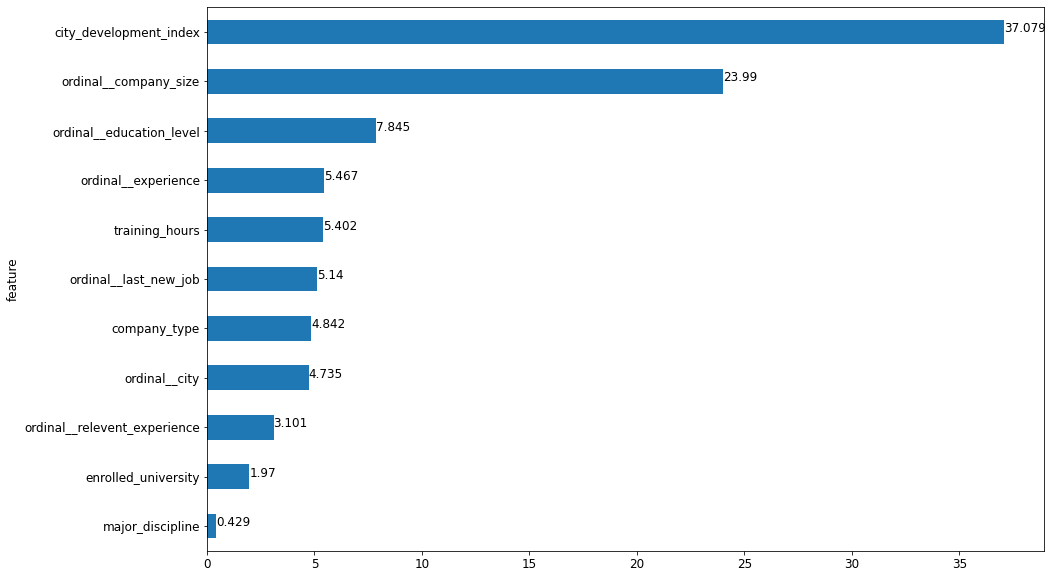

In [371]:
feature_names = x_train_ord.columns
coefs = best_model.feature_importances_
zipped = zip(feature_names, coefs)
df1 = pd.DataFrame(zipped, columns=["feature", "value"])
ax = df1.set_index('feature')['value'].sort_values().plot(kind='barh',figsize=(15,10))
for index, value in enumerate(round(df1.set_index('feature')['value'].sort_values(),3)):
    plt.text((value), index,
             str(value))

## Adjusting Threshold

In [372]:
x_train2,x_val,y_train2,y_val=train_test_split(x_train_ord,y_train,stratify=y_train,test_size=.25,random_state=2020)

In [415]:
model_main.fit(x_train2,y_train2)
th_value=[i/100 for i in range (20,80)]
score=0
score_list=[]

for i in th_value:
    y_prob=best_model.predict_proba(x_val)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=fbeta_score(y_val,y_pred,beta=0.5)
    score_list.append(score_temp)
    
    if score_temp>score:
        score=score_temp
        
        best_score=score
        best_th=i

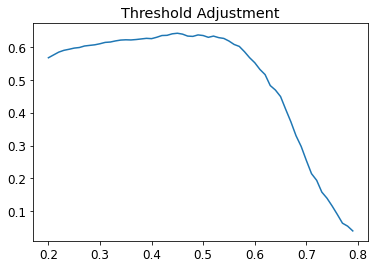

In [416]:
sns.lineplot(th_value,score_list)
plt.title("Threshold Adjustment")
plt.show()

In [417]:
print("best score", best_score)
print("best th",best_th)

best score 0.6414081145584727
best th 0.45


In [424]:
model.fit(x_train_ord,y_train)
y_prob=best_model.predict_proba(x_test_ord)[:,1]
y_pred_th=np.where(y_prob>best_th,1,0)

In [426]:
model_th = fbeta_score(y_test,y_pred,beta=0.5)
cr_th = classification_report(y_test,y_pred_th)

pd.DataFrame({'model':['Catboost with tunning','Catboost with tunning adj Th'],
             'F1 score':[f1_tun,model_th]
             }).set_index('model').sort_values(by='F1 score',ascending=False)

,F1 score
model,
Catboost with tunning adj Th,0.590229
Catboost with tunning,0.585963


In [422]:
print(f'''Classification report Catboost after tunning
{cr_tun}

Classification report Catboost after tunning adj Th
{cr_th}
''')

Classification report Catboost after tunning
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      2877
         1.0       0.59      0.56      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.72      3832
weighted avg       0.79      0.79      0.79      3832


Classification report Catboost after tunning adj Th
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2877
         1.0       0.58      0.62      0.60       955

    accuracy                           0.79      3832
   macro avg       0.73      0.74      0.73      3832
weighted avg       0.80      0.79      0.80      3832




Best performance from this model is 59% from Catboost After Tuning with Adjusment Threshold

# Interpretable & Explainable of ML (SHAP)

Shapley Value is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. SHAP plot describes better visualization in value-level, so we can entrust more on how our feature is being important to the model

In [378]:
import shap
shap.initjs()

In [379]:
# Make new numerized df for shap
features = ['enrolled_university','major_discipline','company_type']
x_train_shap = x_train_ord.copy()
x_test_shap = x_test_ord.copy()

for i in features:
    le = LabelEncoder()
    le.fit(df[i])
    x_test_shap[i] = le.transform(x_test_ord[i])
    x_train_shap[i] = le.transform(x_train_ord[i])
    
for i in x_train_shap.select_dtypes(object).columns:
    x_train_shap[i] = pd.to_numeric(x_train_shap[i])

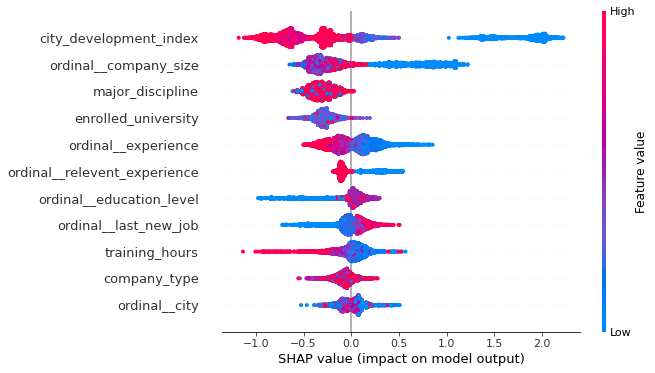

In [380]:
shap_values = shap.TreeExplainer(best_model,
                                feature_dependence= 'independent',
                                model_output= 'raw').shap_values(x_train_shap)
shap.summary_plot(shap_values, x_train_shap, feature_names=feature_names)

**Sidenotes:**

We know that `relevent_experience` has only 2 values, which is 0 (for No relevent experience), and 1 (for Has relevent experience boolean). SHAP Values of `relevent_experience`, which are on the right side of `X-axis = 0.0`, are blue-colored. This means that when `relevent_experience` score is = 0 (No relevent experience), so the probability of `1 (Looking for a job change)` is much higher compared to the `Has relevent experience` 

***
$\mathbf{\text{Business Insights}}$<br>
***

1.&emsp;**Domicile Factor**
<br>Candidate that comes from low `city_development_index` has higher chance to look for a new job compared to the higher one.</br>

2.&emsp;**Company Size**
<br>Candidate that comes from low `company_size` has higher chance to look for a new job compared to the higher one.</br>

3.&emsp;**Experience**
<br>Candidate that have low `Experience` has higher chance to look for a new job compared to the higher one.</br>

4.&emsp;**Relevant Experience Factor**
<br>Candidate that has `no_relevant_experience` has higher chance to look for a new job, compared to those who `Has relevant experience`  </br>

5.&emsp;**Education Factor**
<br>Candidate that has higher `education_level` has higher chance to look for a new job, compared to those who has lower `education_level`.</br>

6.&emsp;**Last New Job Factor**
<br>Candidate that has higher  `last_new_job` has higher chance to look for a new job.</br>

7.&emsp;**Training Hours**
<br>Candidate that has higher  `Training_hours` has higher chance to not looking for a new job.</br>

In [381]:
def plot_shap(ind):
    explainer = shap.TreeExplainer(best_model)
    chosen_instance = x_test_ord.iloc[[ind]]
    shap_values = explainer.shap_values(chosen_instance)
    shap.force_plot(explainer.expected_value, shap_values[0], chosen_instance, matplotlib=True)

The model predict that this candidate is: looking for a job change from y_test


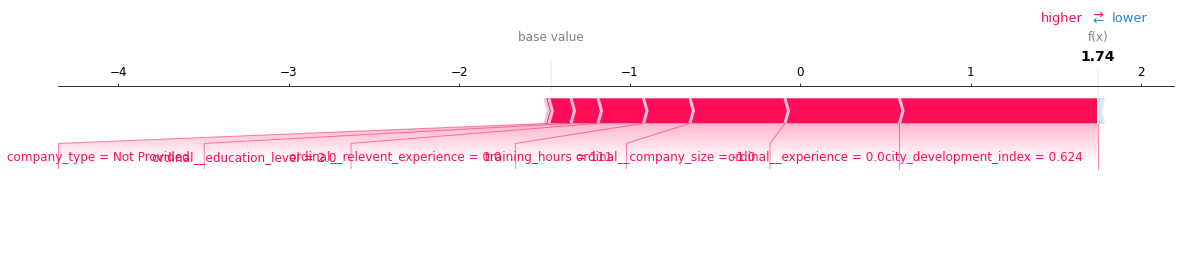

In [460]:
print(f'The model predict that this candidate is: {("looking for a job change" if y_test.iloc[np.argmax(y_prob)]==1 else "not looking for a job change")} from y_test')
plot_shap(np.argmax(y_prob))

The observation in which our model predict the candidate that has the highest probability to look for a job change on X-test, has `company_size  = -1 (Not Provided)`, `company_type = No Provided`,`city = 64`,`relevent_experience = 1 (no relevent experience)`,`enrolled_university = No enrollment`, `experience = 0 (<1)`,`last_new_job = 1 (never)`, and `education_level = 2 (Graduate)` 

In short, this candidate is a `No enrollment` and `a Graduate` who did not entry `company_size` and `company_type`, having < 1 year of experience but no relevent experience, and never last new job. The model predicted this candidate  is `looking for a job change` since the **output value > 0** which is **1.74**.

> Short explanation: These features (The observation in which our model predict the candidate that has the highest probability to look for a job change on X-test, has `company_size  = -1 (Not Provided)`, `company_type = No Provided`,`city = 64`,`relevent_experience = 0 (no relevent experience)`, etc) support more impact on predicting target into 1, can be seen on the red-bar graph of their contributions, compared to the blue-bar graph.

The prediction result and the real dataset shown the same result, which is `looking for a job change`. 

In [461]:
x_test_ord.iloc[np.argmax(y_prob)]

ordinal__city                              64
ordinal__relevent_experience                0
ordinal__education_level                    2
ordinal__experience                         0
ordinal__company_size                      -1
ordinal__last_new_job                       1
city_development_index                  0.624
enrolled_university             No enrollment
major_discipline                         STEM
company_type                     Not Provided
training_hours                            111
Name: 1696, dtype: object

The model predict that this candidate is: not looking for a job change from y_test


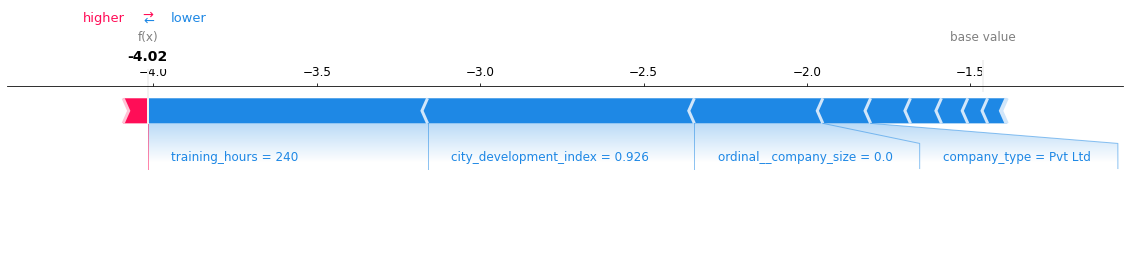

In [464]:
print(f'The model predict that this candidate is: {("looking for a job change" if np.argmin(y_prob)==1 else "not looking for a job change")} from y_test')
plot_shap(np.argmin(y_prob))

The observation in which our model predict the candidate that has the lowest probability to look for a job change on X-test, has `training_hours = 240`,`city_development_index  = 0.926`,  `company_size = 0 (<10)`, `company_type = pvt Ltd`.

In short, this candidate is coming from high `city_development_index`  <10 `company_size`, and `company_type` from Pvt Ltd. The model predicted this candidate  is `not looking for a job change` since the **output value < 0** which is **-4.02**.

> Short explanation: These features (,`city_development_index  = 0.926`,  `company_size = <10 `, `training_hours` = 240,`company_type`=Pvt Ltd, etc) support more impact on predicting target into 0, can be seen on the blue-bar graph of their contributions, compared to the red-bar graph.

The prediction result and the real dataset shown the same result, which is `not looking for a job change`. 

In [463]:
x_test_ord.iloc[np.argmin(y_prob)]

ordinal__city                              13
ordinal__relevent_experience                1
ordinal__education_level                    2
ordinal__experience                         9
ordinal__company_size                       0
ordinal__last_new_job                       1
city_development_index                  0.926
enrolled_university             No enrollment
major_discipline                   Humanities
company_type                          Pvt Ltd
training_hours                            240
Name: 3419, dtype: object

# Example Application in Real Life

The example use data test in data set to predict candidates and help recruitment process

In [386]:
x_test

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
10477,city_16,0.910,No relevent experience,No enrollment,High School,NA Non Degree,6,5000-9999,Not Provided,1,7
6388,city_21,0.624,Has relevent experience,Not Provided,Graduate,STEM,3,Not Provided,Not Provided,1,198
6274,city_159,0.843,No relevent experience,Full time course,High School,NA Non Degree,1,No Employment,No Employment,never,6
15824,city_103,0.920,Has relevent experience,No enrollment,Graduate,Other,>20,Not Provided,Not Provided,1,68
16336,city_103,0.920,No relevent experience,No enrollment,Primary School,NA Non Degree,3,Not Provided,Not Provided,never,198
...,...,...,...,...,...,...,...,...,...,...,...
17022,city_67,0.855,Has relevent experience,No enrollment,Masters,STEM,6,50-99,Pvt Ltd,1,42
3668,city_28,0.939,No relevent experience,No enrollment,High School,NA Non Degree,3,10000+,Pvt Ltd,3,59
2505,city_136,0.897,Has relevent experience,No enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,153
1720,city_144,0.840,Has relevent experience,No enrollment,Graduate,STEM,14,10-49,Pvt Ltd,3,52


In [432]:
# Result report
df_test = df.iloc[x_test.index][['enrollee_id']]
df_test['y_pred'] = y_pred_tunning
df_test['y_test'] = y_test
df_test = df_test.set_index('enrollee_id')
df_test[df_test['y_pred']==1]

,y_pred,y_test
enrollee_id,,
7757,1.0,0.0
3525,1.0,1.0
30990,1.0,1.0
6965,1.0,0.0
7845,1.0,1.0
...,...,...
30768,1.0,1.0
30042,1.0,0.0
29442,1.0,0.0


In [433]:
df_test[(df_test['y_pred']==1)&(df_test['y_test']==1)]

,y_pred,y_test
enrollee_id,,
3525,1.0,1.0
30990,1.0,1.0
7845,1.0,1.0
7022,1.0,1.0
31113,1.0,1.0
...,...,...
5535,1.0,1.0
9289,1.0,1.0
30768,1.0,1.0


Our model can filter from 3832 candidates to 894 candidates with 531 candidates were predicted true (59%).

**Result:**  

<p style='text-align: justify;'>From this example, we can see if the HR dont use the machine learning to help them on process recruitment, they must try offer 3832 candidates to get candidate with percentage of success is only 25% (Target is imbalance and because of we use stratified, y_test have same proportion too). But if HR use machine learning, they just offer 894 candidates with percentage of success is 59%. Based on Appliqant source, we can assume the cost for screening the candidates is 40 dollar / person. If HR Department dont use machine learning, they will spend 153,280 dollar, but if HR Department use machine learning, they will spend 35,760 dollar with higher probability to success than not use machine learning. It means with machine learning HR Department can save cost 117,520 dollar / 77% (if they offer to all candidates).  
<p style='text-align: justify;'>After this step, HR Department will continuous the process to select candidate who suitable with the qualification. We need enough number of candidates because only 2% candidates will pass the qualification screening based on Zety sources. In this example from 894, only 17 candidates can be considered to be recruited (if total person who did the training is decreasing, the number of candidates who can be considered to be recruited is decreasing too). With old method, if HR can offer 6 candidates per day, they need 149 work days to finish (1 person) but with machine learning, it can finished under 1 week. Based on Cognefeed 1 production of machine learning will spend 37,000 dollar but with machine learning, cost in process recruitment will save 117,520 so the company will save 80,250 dollar

# Conclusion and Recommendation

## Conclusion

In [434]:
# Evaluation score of model machine learning used in this project sorted by process sequence
pd.DataFrame({'Model':["Logistic regression","KNN","Decision Tree","Random Forest","XGB","Catboost","Catboost SMOTENC Train","Catboost Weighted Balanced Train","Catboost SMOTENC Test","Catboost Weighted Balanced Test","Catboost RUS","Catboost with Tunning","Catboost with Tunning and Adj Th"],
             'F1 score':[rata[0],rata[1],rata[2],rata[3],rata[4],rata[5],cv_score[0],cv_score[1],imb_test_score[0],imb_test_score[1],fhalf_rus,f1_tun,model_th]
             }).set_index('Model')

,F1 score
Model,
Logistic regression,0.425720
KNN,0.438909
Decision Tree,0.538511
Random Forest,0.558330
XGB,0.564736
Catboost,0.588775
Catboost SMOTENC Train,0.826825
Catboost Weighted Balanced Train,0.576533
Catboost SMOTENC Test,0.585649


In [391]:
# Classification report of final model
print(cr_tun)

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      2877
         1.0       0.59      0.56      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.72      3832
weighted avg       0.79      0.79      0.79      3832



<p style='text-align: justify;'> Dataset contains information about people who completed training and the label of people who are looking for a job change or not.  
We tried 5 models and got the result with high marks (strong learner) which are Catboost, Xgboost, Random forest, KNN, and Logistic regression. Since the dataset contains more catagorical than numerical features, Catboost got the best performance then other models because it is very good to handle catagorical features. So, we continued to use Catboost for the next step.
    
<p style='text-align: justify;'> This dataset has imbalance label data with the number of label 0 is 3 times more than label 1. To handle it, we compared 2 methods, which are SMOTENC, balanced class weight, and Random undersampling. The result is default model gives better performance than the others. SMOTENC have overfitting result because SMOTENC replicate the data and it will get good result only in training set.  
    
<p style='text-align: justify;'> We try to adjust the treshold to make prediction in precision of class one increase and get best threshold in 0.73, we try to keep the number of candidates so we didn't higher threshold and feel threshold in 0.73 is enough. To optimize the model, we did hyperparameter tunning using grid search and found model aftertuning gave better performance. To make our model is explainable and interpretable, we used SHAP method. With SHAP, we can answer the problem to help HR Departments to reach their goals as mentioned in the problem statement. </p>

The characteristics of candidates who are looking for a job change have following features :

1.&emsp;**Domicile Factor**
<br>Candidate that comes from low `city_development_index` has higher chance to look for a new job compared to the higher one.</br>

2.&emsp;**Company Size**
<br>Candidate that comes from low `company_size` has higher chance to look for a new job compared to the higher one.</br>

3.&emsp;**Experience**
<br>Candidate that have low `Experience` has higher chance to look for a new job compared to the higher one.</br>

4.&emsp;**Relevant Experience Factor**
<br>Candidate that has `no_relevant_experience` has higher chance to look for a new job, compared to those who `Has relevant experience`  </br>

5.&emsp;**Education Factor**
<br>Candidate that has higher `education_level` has higher chance to look for a new job, compared to those who has lower `education_level`.</br>

6.&emsp;**Last New Job Factor**
<br>Candidate that has higher  `last_new_job` has higher chance to look for a new job.</br>

7.&emsp;**Training Hours**
<br>Candidate that has higher  `Training_hours` has higher chance to not looking for a new job.</br>

We try to predict the result with data test and get the result if HR Department use machine learning in recruitment process, they can save 77% of cost (money and time) and increase probability success from 25% to 60% on screening process (based on example) and company no need to spend much money to find candidates because we already have candidates database. Beside that the HR can get more option of candidates because machine learning can do it faster than human with more objective result. Machine learning can boost time of recruitment process and make company save 80,250 dollar, so we recommend to use machine learning

## Recommendation

* HR can focus to offer the job for candidates who live in city_160 because all candidates from this city is looking for a new job and city_21 because the proportion of candidates who looking for a job is higher than candidates who not looking for a job change
* HR can develop data collecting method to get another features for analyzed and better data quality to help data scientist make a better prediction model
* HR can look for the candidates who come from cities with lower city development index, have no relevent experience, higher education level, lower job experience, and higher last new job to get higher chance of candidates that are looking for a job.
* HR can make the training more compact because a lot of people don't spend much time to complete the training and attract more people to do the training.
* Data scientist can continue the project to make machine learning to determine qualification of candidate so process recruitment can be faster and more objective.
* To recruit employee with 5 option of candidates, HR Departments need 1000 candidates who did the training to be screening (based on calculated in example)

# References

Background
* https://www.hourly.io/post/how-is-labor-cost-calculated
* https://www.ijsr.net/archive/v3i1/MDIwMTM2NTI%3D.pdf
* https://academicjournals.org/article/article1380537420_Ongori.pdf

Metric Evaluation:
* https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

WOE & IV
* https://towardsdatascience.com/model-or-do-you-mean-weight-of-evidence-woe-and-information-value-iv-331499f6fc2#:~:text=Specifically%2C%20when%20it%20comes%20to%20classification%20problems%2C%20WoE,which%20is%20based%20on%20them%20defaulting%20credit%20repayment.

SMOTENC  
* https://medium.com/@cmukesh8688/how-to-handle-imbalanced-classification-problems-4a96f42ae4c4  

CATBOOST MODEL  
* https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html
* https://dataaspirant.com/catboost-algorithm/
* https://medium.com/analytics-vidhya/catboost-101-fb2fdc3398f3

Case Study
* https://zety.com/blog/hr-statistics
* https://appliqant.com/2018/07/30/the-cost-of-an-interview/#:~:text=If%20the%20average%20recruiter%20bills%20roughly%20%2440%20per,an%20average%20of%20%2440%20or%20more%20per%20candidate.
* https://medium.com/cognifeed/the-cost-of-machine-learning-projects-7ca3aea03a5c#:~:text=Based%20on%20our%20assumptions%2C%20a%20machine%20learning%20project,%28excluding%20the%20hard-to-determine%20opportunity%20cost%29%20%2451%2C750%20to%20%24136%2C750.